# Imports

In [2]:
import pickle
import pandas as pd
import numpy as np

# plotting
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
plt.rcParams['figure.figsize'] = [20, 10]

# custom functions
import sys
sys.path.append(r"C:\Users\User\Documents\projects\LHL_final_project_influenza_forecasting\src")
from evaluate_model import *

# Datasets

In [3]:
df_all_features = pickle.load(open(r"..\data\df_all_features.pkl", "rb" ))
df_pre_COVID_all_features = pickle.load(open(r"..\data\df_pre_COVID_all_features.pkl", "rb" ))
df_COVID_all_features = pickle.load(open(r"..\data\df_COVID_all_features.pkl", "rb" ))

# RF, all features - Gridsearch - Iteration 1

In [89]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor

parameters = {  
                'n_estimators':(80,100,120),
                'criterion':('squared_error', 'absolute_error', 'poisson'),
                'max_depth':(2,3,None),
                'min_samples_split':(2,3,4),
                'min_samples_leaf':(1,2,3),
                'min_weight_fraction_leaf':(0.0,0.1,0.2),
                'max_features':('sqrt', 'log2', None),
                'max_leaf_nodes':(5,10,None),
                'min_impurity_decrease':(0.0,0.1,0.2),
                # 'bootstrap':(True,False),
                # 'oob_score':(True,False),
                'n_jobs':([-1]),
                'random_state':([2022]),
                'ccp_alpha':(0.0,0.1,0.2),
                'max_samples':(10,20,None)
                }

rf = RandomForestRegressor()

model = RandomizedSearchCV(rf, parameters, random_state=2022, scoring='neg_root_mean_squared_error')

In [90]:
model.fit(train_X, train_y)

RandomizedSearchCV(estimator=RandomForestRegressor(),
                   param_distributions={'ccp_alpha': (0.0, 0.1, 0.2),
                                        'criterion': ('squared_error',
                                                      'absolute_error',
                                                      'poisson'),
                                        'max_depth': (2, 3, None),
                                        'max_features': ('sqrt', 'log2', None),
                                        'max_leaf_nodes': (5, 10, None),
                                        'max_samples': (10, 20, None),
                                        'min_impurity_decrease': (0.0, 0.1,
                                                                  0.2),
                                        'min_samples_leaf': (1, 2, 3),
                                        'min_samples_split': (2, 3, 4),
                                        'min_weight_fraction_leaf': (0.0, 0.1,
                                                                     0.2),
                                        'n_estimators': (80, 100, 120),
                                        'n_jobs': [-1],
                                        'random_state': [2022]},
                   random_state=2022, scoring='neg_root_mean_squared_error')

In [91]:
model.best_params_

{'random_state': 2022,
 'n_jobs': -1,
 'n_estimators': 100,
 'min_weight_fraction_leaf': 0.2,
 'min_samples_split': 2,
 'min_samples_leaf': 3,
 'min_impurity_decrease': 0.1,
 'max_samples': None,
 'max_leaf_nodes': None,
 'max_features': None,
 'max_depth': None,
 'criterion': 'squared_error',
 'ccp_alpha': 0.0}

In [92]:
preds_test = model.predict(test_X)
preds_train = model.predict(train_X)

In [93]:
evaluate_model(test=test_y, predictions_test=preds_test, train=train_y, predictions_train=preds_train)

[377642.294, 614.526, 360.54, 430344.993, 656.007, 656.007]

In [55]:
pickle.dump(model, open(r"..\data\rf_all_features_1_week.pkl", "wb" ))

# RF, all features - Gridsearch Iteration 2

In [94]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor

parameters = {  
                'n_estimators':(120,160,200),
                'criterion':(['poisson']),
                'max_depth':([2]),
                'min_samples_split':(4,5,6),
                'min_samples_leaf':(3,4,5),
                'min_weight_fraction_leaf':(0.05,0.1,0.15),
                'max_features':([None]),
                'max_leaf_nodes':(4,5,6,None),
                'min_impurity_decrease':(0.0,0.05),
                # 'bootstrap':(True,False),
                # 'oob_score':(True,False),
                'n_jobs':([-1]),
                'random_state':([2022]),
                'ccp_alpha':(0.0,0.05),
                'max_samples':([None])
                }

rf = RandomForestRegressor()

model = RandomizedSearchCV(rf, parameters, random_state=2022, scoring='neg_root_mean_squared_error')

In [95]:
model.fit(train_X, train_y)

RandomizedSearchCV(estimator=RandomForestRegressor(),
                   param_distributions={'ccp_alpha': (0.0, 0.05),
                                        'criterion': ['poisson'],
                                        'max_depth': [2],
                                        'max_features': [None],
                                        'max_leaf_nodes': (4, 5, 6, None),
                                        'max_samples': [None],
                                        'min_impurity_decrease': (0.0, 0.05),
                                        'min_samples_leaf': (3, 4, 5),
                                        'min_samples_split': (4, 5, 6),
                                        'min_weight_fraction_leaf': (0.05, 0.1,
                                                                     0.15),
                                        'n_estimators': (120, 160, 200),
                                        'n_jobs': [-1],
                                        'random_state': [2022]},
                   random_state=2022, scoring='neg_root_mean_squared_error')

In [96]:
model.best_params_

{'random_state': 2022,
 'n_jobs': -1,
 'n_estimators': 200,
 'min_weight_fraction_leaf': 0.05,
 'min_samples_split': 4,
 'min_samples_leaf': 4,
 'min_impurity_decrease': 0.05,
 'max_samples': None,
 'max_leaf_nodes': None,
 'max_features': None,
 'max_depth': 2,
 'criterion': 'poisson',
 'ccp_alpha': 0.05}

In [97]:
preds_test = model.predict(test_X)
preds_train = model.predict(train_X)

In [98]:
evaluate_model(test=test_y, predictions_test=preds_test, train=train_y, predictions_train=preds_train)

[153844.097, 392.23, 242.355, 283000.657, 531.978, 531.978]

In [61]:
pickle.dump(model, open(r"..\data\rf_all_features_1_week.pkl", "wb" ))

# RF, all features - Gridsearch Iteration 3 - Best One

### 1 week

In [99]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor

parameters = {  
                'n_estimators':(200,220,240),
                'criterion':(['poisson']),
                'max_depth':([2]),
                'min_samples_split':([5]),
                'min_samples_leaf':([3]),
                'min_weight_fraction_leaf':(0.03,0.05,0.08),
                'max_features':([None]),
                'max_leaf_nodes':([4]),
                'min_impurity_decrease':(0.03,0.05,0.08),
                'n_jobs':([-1]),
                'random_state':([2022]),
                'ccp_alpha':(0.03,0.05,0.08),
                'max_samples':([None])
                }

rf = RandomForestRegressor()

model = RandomizedSearchCV(rf, parameters, random_state=2022, scoring='neg_root_mean_squared_error')

In [100]:
model.fit(train_X, train_y)

RandomizedSearchCV(estimator=RandomForestRegressor(),
                   param_distributions={'ccp_alpha': (0.03, 0.05, 0.08),
                                        'criterion': ['poisson'],
                                        'max_depth': [2],
                                        'max_features': [None],
                                        'max_leaf_nodes': [4],
                                        'max_samples': [None],
                                        'min_impurity_decrease': (0.03, 0.05,
                                                                  0.08),
                                        'min_samples_leaf': [3],
                                        'min_samples_split': [5],
                                        'min_weight_fraction_leaf': (0.03, 0.05,
                                                                     0.08),
                                        'n_estimators': (200, 220, 240),
                                        'n_jobs': [-1],
                                        'random_state': [2022]},
                   random_state=2022, scoring='neg_root_mean_squared_error')

In [101]:
model.best_params_

{'random_state': 2022,
 'n_jobs': -1,
 'n_estimators': 240,
 'min_weight_fraction_leaf': 0.08,
 'min_samples_split': 5,
 'min_samples_leaf': 3,
 'min_impurity_decrease': 0.03,
 'max_samples': None,
 'max_leaf_nodes': 4,
 'max_features': None,
 'max_depth': 2,
 'criterion': 'poisson',
 'ccp_alpha': 0.05}

In [102]:
preds_test = model.predict(test_X)
preds_train = model.predict(train_X)

In [103]:
evaluate_model(test=test_y, predictions_test=preds_test, train=train_y, predictions_train=preds_train)

[154415.92, 392.958, 242.746, 199913.889, 447.117, 447.117]

In [104]:
pickle.dump(model, open(r"..\data\rf_all_features_1_week.pkl", "wb" ))

### 2 weeks

In [5]:
# split into train and test
X = df_pre_COVID_all_features.loc[:, df_pre_COVID_all_features.columns != 'Total Cases']
y = df_pre_COVID_all_features['Total Cases']

train_X = X.iloc[:-2].to_numpy()
train_y = y.iloc[:-2].to_numpy().reshape(-1,1)
test_X = X.iloc[-2:].to_numpy()
test_y = np.asarray(y.iloc[-2:]).reshape(-1,1)

print(f'Shape of train_X: {train_X.shape}')
print(f'Shape of train_y: {train_y.shape}')
print(f'Shape of test_X: {test_X.shape}')
print(f'Shape of test_y: {test_y.shape}')

Shape of train_X: (155, 48)
Shape of train_y: (155, 1)
Shape of test_X: (2, 48)
Shape of test_y: (2, 1)


In [16]:
# scale data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
train_X = scaler.fit_transform(train_X)
test_X = scaler.transform(test_X)

In [21]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=240, criterion='squared_error', max_depth=2, min_samples_split=5, min_samples_leaf=3, min_weight_fraction_leaf=0.08, max_features=None, max_leaf_nodes=4, min_impurity_decrease=0.03, bootstrap=True, oob_score=False, n_jobs=None, random_state=2022, verbose=0, warm_start=False, ccp_alpha=0.05, max_samples=None)
model.fit(train_X, train_y.ravel())

RandomForestRegressor(ccp_alpha=0.05, max_depth=2, max_features=None,
                      max_leaf_nodes=4, min_impurity_decrease=0.03,
                      min_samples_leaf=3, min_samples_split=5,
                      min_weight_fraction_leaf=0.08, n_estimators=240,
                      random_state=2022)

In [22]:
preds_test = model.predict(test_X)
preds_train = model.predict(train_X)

In [23]:
evaluate_model(test=test_y, predictions_test=preds_test, train=train_y, predictions_train=preds_train)

[139454.467, 373.436, 245.23, 273882.207, 523.338, 521.807]

In [24]:
pickle.dump(model, open(r"..\data\rf_all_features_2_week.pkl", "wb" ))

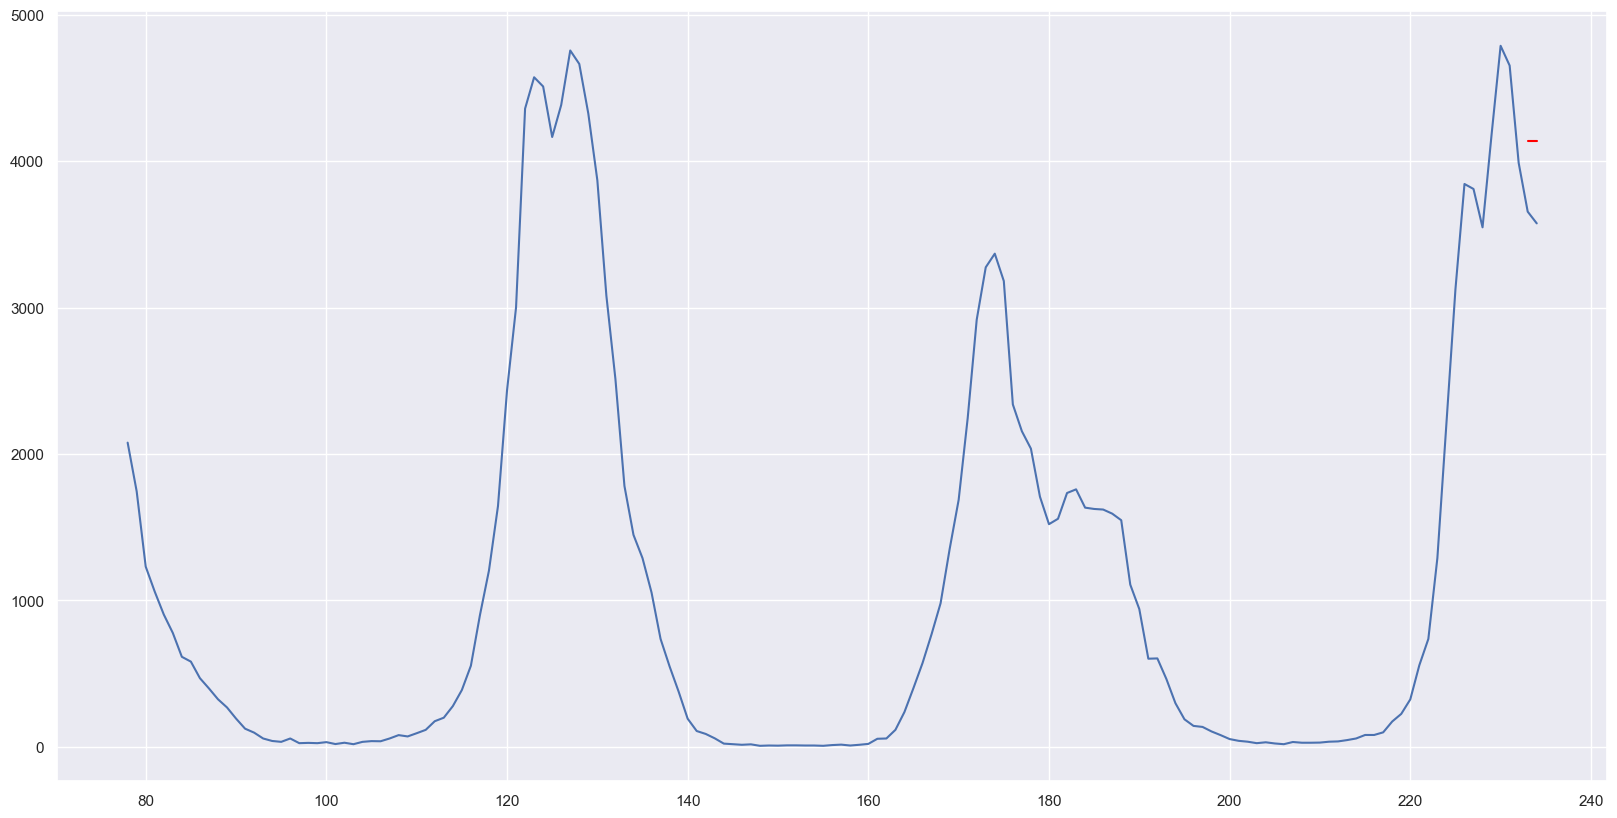

In [25]:
plt.plot(df_pre_COVID_all_features.index, df_pre_COVID_all_features['Total Cases'].values)
plt.plot(df_pre_COVID_all_features.index[-2:], preds_test, color='red')

### 3 weeks

In [26]:
# split into train and test
X = df_pre_COVID_all_features.loc[:, df_pre_COVID_all_features.columns != 'Total Cases']
y = df_pre_COVID_all_features['Total Cases']

train_X = X.iloc[:-3].to_numpy()
train_y = y.iloc[:-3].to_numpy().reshape(-1,1)
test_X = X.iloc[-3:].to_numpy()
test_y = np.asarray(y.iloc[-3:]).reshape(-1,1)

print(f'Shape of train_X: {train_X.shape}')
print(f'Shape of train_y: {train_y.shape}')
print(f'Shape of test_X: {test_X.shape}')
print(f'Shape of test_y: {test_y.shape}')

Shape of train_X: (154, 48)
Shape of train_y: (154, 1)
Shape of test_X: (3, 48)
Shape of test_y: (3, 1)


In [27]:
# scale data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
train_X = scaler.fit_transform(train_X)
test_X = scaler.transform(test_X)

In [28]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=240, criterion='squared_error', max_depth=2, min_samples_split=5, min_samples_leaf=3, min_weight_fraction_leaf=0.08, max_features=None, max_leaf_nodes=4, min_impurity_decrease=0.03, bootstrap=True, oob_score=False, n_jobs=None, random_state=2022, verbose=0, warm_start=False, ccp_alpha=0.05, max_samples=None)
model.fit(train_X, train_y.ravel())

RandomForestRegressor(ccp_alpha=0.05, max_depth=2, max_features=None,
                      max_leaf_nodes=4, min_impurity_decrease=0.03,
                      min_samples_leaf=3, min_samples_split=5,
                      min_weight_fraction_leaf=0.08, n_estimators=240,
                      random_state=2022)

In [29]:
preds_test = model.predict(test_X)
preds_train = model.predict(train_X)

In [30]:
evaluate_model(test=test_y, predictions_test=preds_test, train=train_y, predictions_train=preds_train)

[140939.734, 375.419, 247.003, 148658.357, 385.562, 341.576]

In [31]:
pickle.dump(model, open(r"..\data\rf_all_features_3_week.pkl", "wb" ))

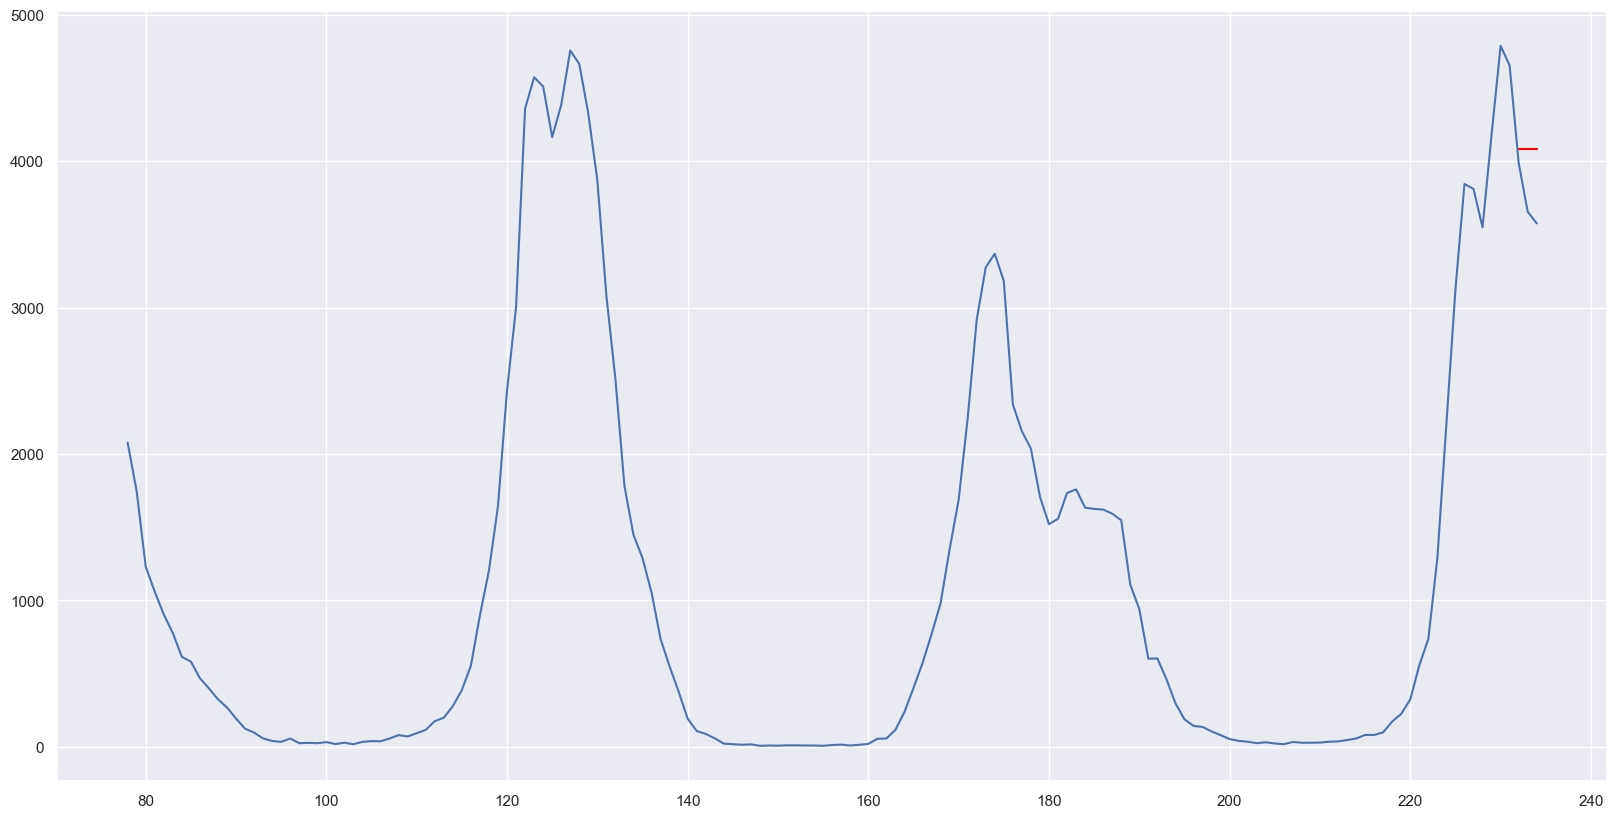

In [32]:
plt.plot(df_pre_COVID_all_features.index, df_pre_COVID_all_features['Total Cases'].values)
plt.plot(df_pre_COVID_all_features.index[-3:], preds_test, color='red')

### 4 weeks

In [33]:
# split into train and test
X = df_pre_COVID_all_features.loc[:, df_pre_COVID_all_features.columns != 'Total Cases']
y = df_pre_COVID_all_features['Total Cases']

train_X = X.iloc[:-4].to_numpy()
train_y = y.iloc[:-4].to_numpy().reshape(-1,1)
test_X = X.iloc[-4:].to_numpy()
test_y = np.asarray(y.iloc[-4:]).reshape(-1,1)

print(f'Shape of train_X: {train_X.shape}')
print(f'Shape of train_y: {train_y.shape}')
print(f'Shape of test_X: {test_X.shape}')
print(f'Shape of test_y: {test_y.shape}')

Shape of train_X: (153, 48)
Shape of train_y: (153, 1)
Shape of test_X: (4, 48)
Shape of test_y: (4, 1)


In [34]:
# scale data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
train_X = scaler.fit_transform(train_X)
test_X = scaler.transform(test_X)

In [35]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=240, criterion='squared_error', max_depth=2, min_samples_split=5, min_samples_leaf=3, min_weight_fraction_leaf=0.08, max_features=None, max_leaf_nodes=4, min_impurity_decrease=0.03, bootstrap=True, oob_score=False, n_jobs=None, random_state=2022, verbose=0, warm_start=False, ccp_alpha=0.05, max_samples=None)
model.fit(train_X, train_y.ravel())

RandomForestRegressor(ccp_alpha=0.05, max_depth=2, max_features=None,
                      max_leaf_nodes=4, min_impurity_decrease=0.03,
                      min_samples_leaf=3, min_samples_split=5,
                      min_weight_fraction_leaf=0.08, n_estimators=240,
                      random_state=2022)

In [36]:
preds_test = model.predict(test_X)
preds_train = model.predict(train_X)

In [37]:
evaluate_model(test=test_y, predictions_test=preds_test, train=train_y, predictions_train=preds_train)

[144205.696, 379.744, 246.902, 180896.83, 425.32, 352.75]

In [38]:
pickle.dump(model, open(r"..\data\rf_all_features_4_week.pkl", "wb" ))

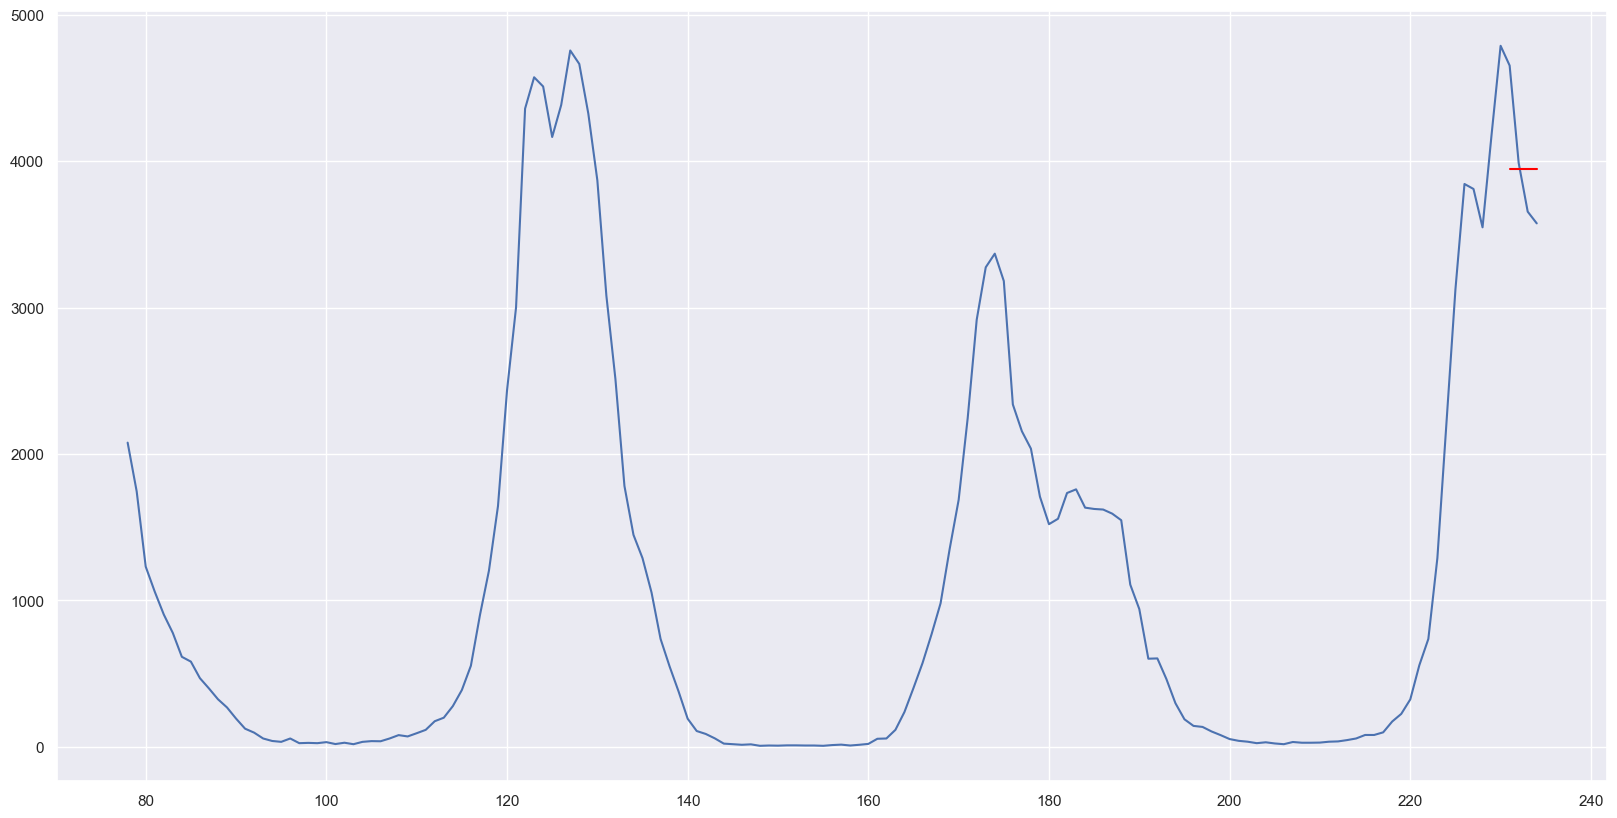

In [39]:
plt.plot(df_pre_COVID_all_features.index, df_pre_COVID_all_features['Total Cases'].values)
plt.plot(df_pre_COVID_all_features.index[-4:], preds_test, color='red')

### 12 weeks

In [40]:
# split into train and test
X = df_pre_COVID_all_features.loc[:, df_pre_COVID_all_features.columns != 'Total Cases']
y = df_pre_COVID_all_features['Total Cases']

train_X = X.iloc[:-12].to_numpy()
train_y = y.iloc[:-12].to_numpy().reshape(-1,1)
test_X = X.iloc[-12:].to_numpy()
test_y = np.asarray(y.iloc[-12:]).reshape(-1,1)

print(f'Shape of train_X: {train_X.shape}')
print(f'Shape of train_y: {train_y.shape}')
print(f'Shape of test_X: {test_X.shape}')
print(f'Shape of test_y: {test_y.shape}')

Shape of train_X: (145, 48)
Shape of train_y: (145, 1)
Shape of test_X: (12, 48)
Shape of test_y: (12, 1)


In [41]:
# scale data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
train_X = scaler.fit_transform(train_X)
test_X = scaler.transform(test_X)

In [42]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=240, criterion='squared_error', max_depth=2, min_samples_split=5, min_samples_leaf=3, min_weight_fraction_leaf=0.08, max_features=None, max_leaf_nodes=4, min_impurity_decrease=0.03, bootstrap=True, oob_score=False, n_jobs=None, random_state=2022, verbose=0, warm_start=False, ccp_alpha=0.05, max_samples=None)
model.fit(train_X, train_y.ravel())

RandomForestRegressor(ccp_alpha=0.05, max_depth=2, max_features=None,
                      max_leaf_nodes=4, min_impurity_decrease=0.03,
                      min_samples_leaf=3, min_samples_split=5,
                      min_weight_fraction_leaf=0.08, n_estimators=240,
                      random_state=2022)

In [43]:
preds_test = model.predict(test_X)
preds_train = model.predict(train_X)

In [44]:
evaluate_model(test=test_y, predictions_test=preds_test, train=train_y, predictions_train=preds_train)

[167680.557, 409.488, 250.794, 604689.881, 777.618, 659.001]

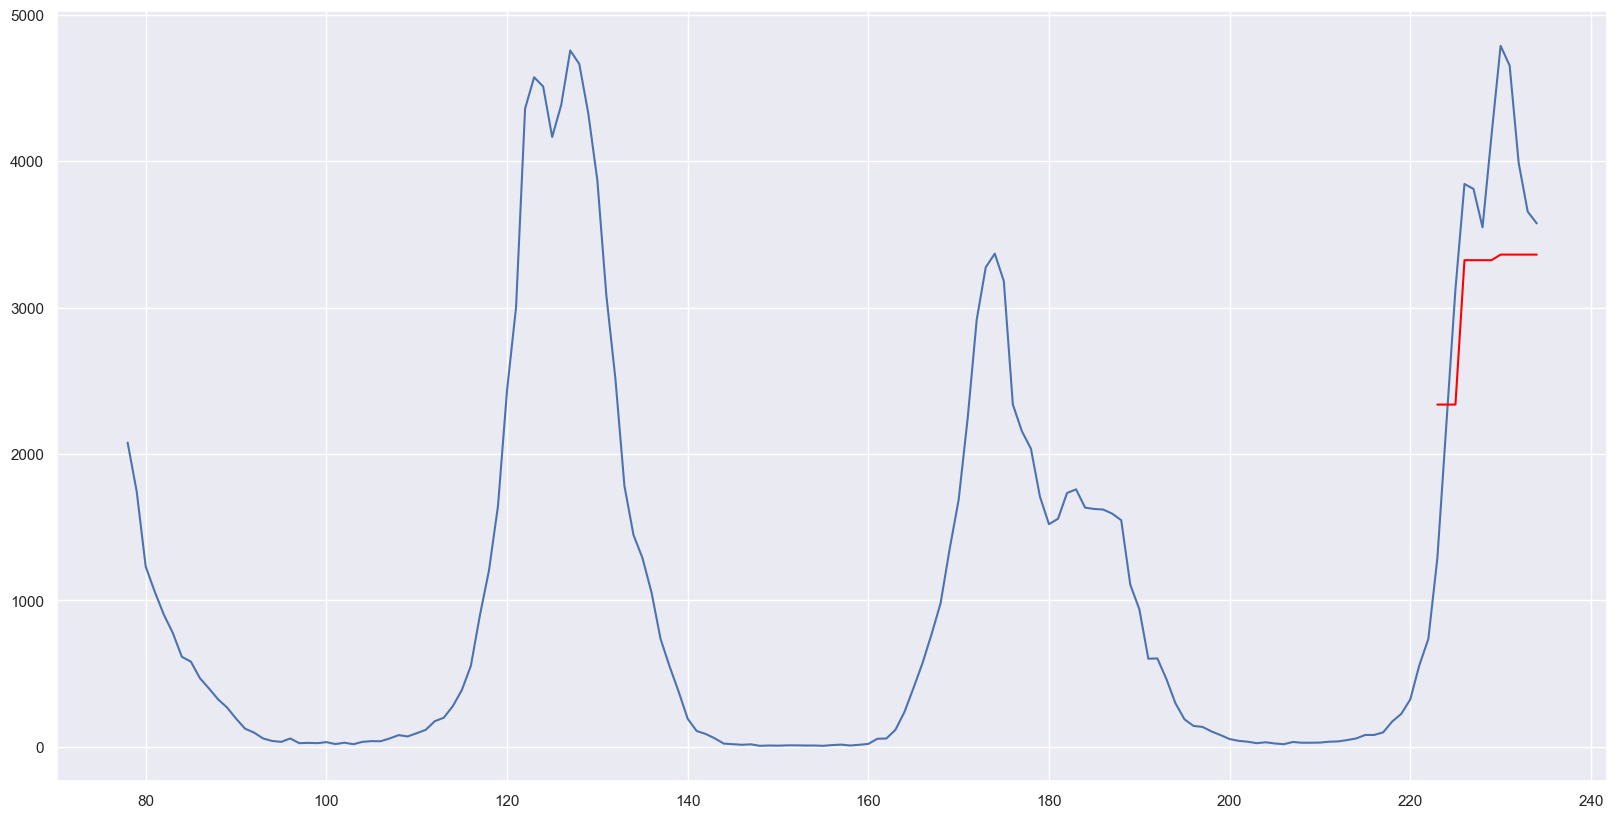

In [45]:
plt.plot(df_pre_COVID_all_features.index, df_pre_COVID_all_features['Total Cases'].values)
plt.plot(df_pre_COVID_all_features.index[-12:], preds_test, color='red')

# RF, all features - Gridsearch Iteration 4

In [105]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor

parameters = {  
                'n_estimators':(210,220,230),
                'criterion':(['poisson']),
                'max_depth':([2]),
                'min_samples_split':([5]),
                'min_samples_leaf':([3]),
                'min_weight_fraction_leaf':(0.07,0.08,0.09),
                'max_features':([None]),
                'max_leaf_nodes':([4]),
                'min_impurity_decrease':(0.07,0.08,0.09),
                'n_jobs':([-1]),
                'random_state':([2022]),
                'ccp_alpha':(0.02,0.03,0.04),
                'max_samples':([None])
                }

rf = RandomForestRegressor()

model = RandomizedSearchCV(rf, parameters, random_state=2022, scoring='neg_root_mean_squared_error')

In [106]:
model.fit(train_X, train_y)

RandomizedSearchCV(estimator=RandomForestRegressor(),
                   param_distributions={'ccp_alpha': (0.02, 0.03, 0.04),
                                        'criterion': ['poisson'],
                                        'max_depth': [2],
                                        'max_features': [None],
                                        'max_leaf_nodes': [4],
                                        'max_samples': [None],
                                        'min_impurity_decrease': (0.07, 0.08,
                                                                  0.09),
                                        'min_samples_leaf': [3],
                                        'min_samples_split': [5],
                                        'min_weight_fraction_leaf': (0.07, 0.08,
                                                                     0.09),
                                        'n_estimators': (210, 220, 230),
                                        'n_jobs': [-1],
                                        'random_state': [2022]},
                   random_state=2022, scoring='neg_root_mean_squared_error')

In [107]:
model.best_params_

{'random_state': 2022,
 'n_jobs': -1,
 'n_estimators': 220,
 'min_weight_fraction_leaf': 0.07,
 'min_samples_split': 5,
 'min_samples_leaf': 3,
 'min_impurity_decrease': 0.07,
 'max_samples': None,
 'max_leaf_nodes': 4,
 'max_features': None,
 'max_depth': 2,
 'criterion': 'poisson',
 'ccp_alpha': 0.03}

In [108]:
preds_test = model.predict(test_X)
preds_train = model.predict(train_X)

In [109]:
evaluate_model(test=test_y, predictions_test=preds_test, train=train_y, predictions_train=preds_train)

[153434.993, 391.708, 241.605, 261683.071, 511.55, 511.55]

# SVM, all features - Gridsearch - Iteration 1

In [125]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn import svm

parameters = {  
                'kernel':('linear', 'poly', 'rbf', 'sigmoid'),
                'degree':(2,3,4),
                'gamma':('scale', 'auto'),
                # 'coef0':(0.0,0.1,0.2),
                # 'tol':(0.001,0.01,0.1),
                # 'C':(0.5,1.0,1.5),
                # 'epsilon':(0.05,0.1,0.15),
                # 'shrinking':(True,False),
                # 'max_iter':(-1,100,200)
                }
sv = svm.SVR()

model = RandomizedSearchCV(sv, parameters, random_state=2022, scoring='neg_root_mean_squared_error')

In [126]:
model.fit(train_X, train_y)

In [ ]:
model.best_params_

In [123]:
preds_test = model.predict(test_X)
preds_train = model.predict(train_X)

In [124]:
evaluate_model(test=test_y, predictions_test=preds_test, train=train_y, predictions_train=preds_train)

[2493574.629, 1579.106, 991.324, 10568724.223, 3250.957, 3250.957]

In [ ]:
pickle.dump(model, open(r"..\data\rf_all_features_1_week.pkl", "wb" ))

# XGBoost, all features - Gridsearch - Iteration 1

In [46]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn import svm

# split into train and test
X = df_pre_COVID_all_features.loc[:, df_pre_COVID_all_features.columns != 'Total Cases']
y = df_pre_COVID_all_features['Total Cases']

train_X = X.iloc[:-1].to_numpy()
train_y = y.iloc[:-1].to_numpy()
test_X = X.iloc[-1].to_numpy().reshape(1,-1)
test_y = np.asarray(y.iloc[-1]).reshape(1,-1)

# train_X = X.iloc[:-1].to_numpy()
# train_y = y.iloc[:-1].to_numpy().reshape(-1,1)
# test_X = X.iloc[-1:].to_numpy()
# test_y = np.asarray(y.iloc[-1:]).reshape(-1,1)

print(f'Shape of train_X: {train_X.shape}')
print(f'Shape of train_y: {train_y.shape}')
print(f'Shape of test_X: {test_X.shape}')
print(f'Shape of test_y: {test_y.shape}')

Shape of train_X: (156, 48)
Shape of train_y: (156,)
Shape of test_X: (1, 48)
Shape of test_y: (1, 1)


In [47]:
# scale data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
train_X = scaler.fit_transform(train_X)
test_X = scaler.transform(test_X)

In [55]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import RandomizedSearchCV

parameters = {  
                'loss':('squared_error', 'absolute_error', 'huber', 'quantile'),
                'learning_rate':(0.1,0.2,0.3),
                'n_estimators':(50,100,150),
                'subsample':(0.1,0.5,1.0),
                'criterion':('friedman_mse', 'squared_error'),
                'max_depth':([2]),
                'min_samples_split':([5]),
                'min_samples_leaf':([3]),
                'min_weight_fraction_leaf':(0.03,0.05,0.08),
                'max_features':([None]),
                'max_leaf_nodes':([4]),
                'min_impurity_decrease':(0.03,0.05,0.08),
                'alpha':(0.7,0.8,0.9),
                'ccp_alpha':(0.03,0.05,0.08)
                }


gb = GradientBoostingRegressor(random_state=2022)

model = RandomizedSearchCV(gb, parameters, random_state=2022, scoring='neg_root_mean_squared_error')

model.fit(train_X, train_y)

preds_test = model.predict(test_X)
preds_train = model.predict(train_X)

evaluate_model(test=test_y, predictions_test=preds_test, train=train_y, predictions_train=preds_train)

[122427.153, 349.896, 189.768, 263723.627, 513.54, 513.54]

In [56]:
model.best_params_

{'subsample': 1.0,
 'n_estimators': 50,
 'min_weight_fraction_leaf': 0.08,
 'min_samples_split': 5,
 'min_samples_leaf': 3,
 'min_impurity_decrease': 0.08,
 'max_leaf_nodes': 4,
 'max_features': None,
 'max_depth': 2,
 'loss': 'huber',
 'learning_rate': 0.1,
 'criterion': 'squared_error',
 'ccp_alpha': 0.08,
 'alpha': 0.7}

# XGBoost, all features - Gridsearch - Iteration 2

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn import svm

# split into train and test
X = df_pre_COVID_all_features.loc[:, df_pre_COVID_all_features.columns != 'Total Cases']
y = df_pre_COVID_all_features['Total Cases']

train_X = X.iloc[:-1].to_numpy()
train_y = y.iloc[:-1].to_numpy()
test_X = X.iloc[-1].to_numpy().reshape(1,-1)
test_y = np.asarray(y.iloc[-1]).reshape(1,-1)

# train_X = X.iloc[:-1].to_numpy()
# train_y = y.iloc[:-1].to_numpy().reshape(-1,1)
# test_X = X.iloc[-1:].to_numpy()
# test_y = np.asarray(y.iloc[-1:]).reshape(-1,1)

print(f'Shape of train_X: {train_X.shape}')
print(f'Shape of train_y: {train_y.shape}')
print(f'Shape of test_X: {test_X.shape}')
print(f'Shape of test_y: {test_y.shape}')

Shape of train_X: (156, 48)
Shape of train_y: (156,)
Shape of test_X: (1, 48)
Shape of test_y: (1, 1)


In [ ]:
# scale data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
train_X = scaler.fit_transform(train_X)
test_X = scaler.transform(test_X)

In [57]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import RandomizedSearchCV

parameters = {  
                'loss':(['huber']),
                'learning_rate':(0.1,0.01,0.001),
                'n_estimators':(30,50,80),
                'subsample':(0.8,0.9,1.0),
                'criterion':(['squared_error']),
                'max_depth':([2]),
                'min_samples_split':([5]),
                'min_samples_leaf':([3]),
                'min_weight_fraction_leaf':(0.07,0.08,0.09),
                'max_features':([None]),
                'max_leaf_nodes':([4]),
                'min_impurity_decrease':(0.07,0.08,0.09),
                'alpha':(0.5,0.6,0.7),
                'ccp_alpha':(0.07,0.08,0.09)
                }


gb = GradientBoostingRegressor(random_state=2022)

model = RandomizedSearchCV(gb, parameters, random_state=2022, scoring='neg_root_mean_squared_error')

model.fit(train_X, train_y)

preds_test = model.predict(test_X)
preds_train = model.predict(train_X)

evaluate_model(test=test_y, predictions_test=preds_test, train=train_y, predictions_train=preds_train)

[155817.274, 394.737, 216.552, 212434.827, 460.907, 460.907]

In [58]:
model.best_params_

{'subsample': 1.0,
 'n_estimators': 30,
 'min_weight_fraction_leaf': 0.07,
 'min_samples_split': 5,
 'min_samples_leaf': 3,
 'min_impurity_decrease': 0.08,
 'max_leaf_nodes': 4,
 'max_features': None,
 'max_depth': 2,
 'loss': 'huber',
 'learning_rate': 0.1,
 'criterion': 'squared_error',
 'ccp_alpha': 0.09,
 'alpha': 0.6}

# XGBoost, all features - Gridsearch - Iteration 3

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn import svm

# split into train and test
X = df_pre_COVID_all_features.loc[:, df_pre_COVID_all_features.columns != 'Total Cases']
y = df_pre_COVID_all_features['Total Cases']

train_X = X.iloc[:-1].to_numpy()
train_y = y.iloc[:-1].to_numpy()
test_X = X.iloc[-1].to_numpy().reshape(1,-1)
test_y = np.asarray(y.iloc[-1]).reshape(1,-1)

# train_X = X.iloc[:-1].to_numpy()
# train_y = y.iloc[:-1].to_numpy().reshape(-1,1)
# test_X = X.iloc[-1:].to_numpy()
# test_y = np.asarray(y.iloc[-1:]).reshape(-1,1)

print(f'Shape of train_X: {train_X.shape}')
print(f'Shape of train_y: {train_y.shape}')
print(f'Shape of test_X: {test_X.shape}')
print(f'Shape of test_y: {test_y.shape}')

Shape of train_X: (156, 48)
Shape of train_y: (156,)
Shape of test_X: (1, 48)
Shape of test_y: (1, 1)


In [ ]:
# scale data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
train_X = scaler.fit_transform(train_X)
test_X = scaler.transform(test_X)

In [61]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import RandomizedSearchCV

parameters = {  
                'loss':(['huber']),
                'learning_rate':(0.09,0.1,0.11),
                'n_estimators':(20,30,40),
                'subsample':([1.0]),
                'criterion':(['squared_error']),
                'max_depth':([2]),
                'min_samples_split':([5]),
                'min_samples_leaf':([3]),
                'min_weight_fraction_leaf':(0.06,0.07,0.08),
                'max_features':([None]),
                'max_leaf_nodes':([4]),
                'min_impurity_decrease':(0.075,0.08,0.085),
                'alpha':(0.55,0.6,0.65),
                'ccp_alpha':(0.085,0.09,0.095)
                }


gb = GradientBoostingRegressor(random_state=2022)

model = RandomizedSearchCV(gb, parameters, random_state=2022, scoring='neg_root_mean_squared_error')

model.fit(train_X, train_y)

preds_test = model.predict(test_X)
preds_train = model.predict(train_X)

evaluate_model(test=test_y, predictions_test=preds_test, train=train_y, predictions_train=preds_train)

[151282.288, 388.95, 213.835, 169772.81, 412.035, 412.035]

In [62]:
model.best_params_

{'subsample': 1.0,
 'n_estimators': 30,
 'min_weight_fraction_leaf': 0.07,
 'min_samples_split': 5,
 'min_samples_leaf': 3,
 'min_impurity_decrease': 0.085,
 'max_leaf_nodes': 4,
 'max_features': None,
 'max_depth': 2,
 'loss': 'huber',
 'learning_rate': 0.1,
 'criterion': 'squared_error',
 'ccp_alpha': 0.085,
 'alpha': 0.55}

In [63]:
pickle.dump(model, open(r"..\data\xgb_all_features_1_week.pkl", "wb" ))

# RF, all features - update - Gridsearch - Iteration 1

In [4]:
# split into train and test
X = df_pre_COVID_all_features.loc[:, df_pre_COVID_all_features.columns != 'Total Cases']
y = df_pre_COVID_all_features['Total Cases']

train_X = X.iloc[:-1].to_numpy()
train_y = y.iloc[:-1].to_numpy()
test_X = X.iloc[-1].to_numpy().reshape(1,-1)
test_y = np.asarray(y.iloc[-1]).reshape(1,-1)

# train_X = X.iloc[:-1].to_numpy()
# train_y = y.iloc[:-1].to_numpy().reshape(-1,1)
# test_X = X.iloc[-1:].to_numpy()
# test_y = np.asarray(y.iloc[-1:]).reshape(-1,1)

print(f'Shape of train_X: {train_X.shape}')
print(f'Shape of train_y: {train_y.shape}')
print(f'Shape of test_X: {test_X.shape}')
print(f'Shape of test_y: {test_y.shape}')

Shape of train_X: (156, 79)
Shape of train_y: (156,)
Shape of test_X: (1, 79)
Shape of test_y: (1, 1)


In [5]:
# scale data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
train_X = scaler.fit_transform(train_X)
test_X = scaler.transform(test_X)

In [6]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor

parameters = {  
                'n_estimators':(80,100,120),
                'criterion':('squared_error', 'absolute_error', 'poisson'),
                'max_depth':(2,3,None),
                'min_samples_split':(2,3,4),
                'min_samples_leaf':(1,2,3),
                'min_weight_fraction_leaf':(0.0,0.1,0.2),
                'max_features':('sqrt', 'log2', None),
                'max_leaf_nodes':(5,10,None),
                'min_impurity_decrease':(0.0,0.1,0.2),
                # 'bootstrap':(True,False),
                # 'oob_score':(True,False),
                'n_jobs':([-1]),
                'random_state':([2022]),
                'ccp_alpha':(0.0,0.1,0.2),
                'max_samples':(10,20,None)
                }

rf = RandomForestRegressor()

model = RandomizedSearchCV(rf, parameters, random_state=2022, scoring='neg_root_mean_squared_error')

In [7]:
model.fit(train_X, train_y)

RandomizedSearchCV(estimator=RandomForestRegressor(),
                   param_distributions={'ccp_alpha': (0.0, 0.1, 0.2),
                                        'criterion': ('squared_error',
                                                      'absolute_error',
                                                      'poisson'),
                                        'max_depth': (2, 3, None),
                                        'max_features': ('sqrt', 'log2', None),
                                        'max_leaf_nodes': (5, 10, None),
                                        'max_samples': (10, 20, None),
                                        'min_impurity_decrease': (0.0, 0.1,
                                                                  0.2),
                                        'min_samples_leaf': (1, 2, 3),
                                        'min_samples_split': (2, 3, 4),
                                        'min_weight_fraction_leaf': (0.0, 0.1,
                                                                     0.2),
                                        'n_estimators': (80, 100, 120),
                                        'n_jobs': [-1],
                                        'random_state': [2022]},
                   random_state=2022, scoring='neg_root_mean_squared_error')

In [8]:
model.best_params_

{'random_state': 2022,
 'n_jobs': -1,
 'n_estimators': 100,
 'min_weight_fraction_leaf': 0.0,
 'min_samples_split': 3,
 'min_samples_leaf': 1,
 'min_impurity_decrease': 0.0,
 'max_samples': None,
 'max_leaf_nodes': None,
 'max_features': 'log2',
 'max_depth': None,
 'criterion': 'poisson',
 'ccp_alpha': 0.0}

In [9]:
preds_test = model.predict(test_X)
preds_train = model.predict(train_X)

In [10]:
evaluate_model(test=test_y, predictions_test=preds_test, train=train_y, predictions_train=preds_train)

[13963.494, 118.167, 68.261, 294729.19, 542.89, 542.89]

In [ ]:
pickle.dump(model, open(r"..\data\rf_all_features_1_week.pkl", "wb" ))

# Voting Regressor - pre-COVID

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn import svm

# split into train and test
X = df_pre_COVID_all_features.loc[:, df_pre_COVID_all_features.columns != 'Total Cases']
y = df_pre_COVID_all_features['Total Cases']

train_X = X.iloc[:-1].to_numpy()
train_y = y.iloc[:-1].to_numpy()
test_X = X.iloc[-1].to_numpy().reshape(1,-1)
test_y = np.asarray(y.iloc[-1]).reshape(1,-1)

# train_X = X.iloc[:-1].to_numpy()
# train_y = y.iloc[:-1].to_numpy().reshape(-1,1)
# test_X = X.iloc[-1:].to_numpy()
# test_y = np.asarray(y.iloc[-1:]).reshape(-1,1)

print(f'Shape of train_X: {train_X.shape}')
print(f'Shape of train_y: {train_y.shape}')
print(f'Shape of test_X: {test_X.shape}')
print(f'Shape of test_y: {test_y.shape}')

Shape of train_X: (156, 48)
Shape of train_y: (156,)
Shape of test_X: (1, 48)
Shape of test_y: (1, 1)


In [ ]:
# scale data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
train_X = scaler.fit_transform(train_X)
test_X = scaler.transform(test_X)

In [ ]:
r1 = RandomForestRegressor(n_estimators=240, criterion='squared_error', max_depth=2, min_samples_split=5, min_samples_leaf=3, min_weight_fraction_leaf=0.08, max_features=None, max_leaf_nodes=4, min_impurity_decrease=0.03, bootstrap=True, oob_score=False, n_jobs=None, random_state=2022, verbose=0, warm_start=False, ccp_alpha=0.05, max_samples=None)
r2 = GradientBoostingRegressor(loss='huber', learning_rate=0.1, n_estimators=30, subsample=1.0, criterion='squared_error', min_samples_split=5, min_samples_leaf=3, min_weight_fraction_leaf=0.07, max_depth=2, min_impurity_decrease=0.085, init=None, random_state=2022, max_features=None, alpha=0.55, verbose=0, max_leaf_nodes=4, warm_start=False, validation_fraction=0.1, n_iter_no_change=None, tol=0.0001, ccp_alpha=0.085)

vr = VotingRegressor([('rf', r1), ('xgb', r2)])
vr.fit(train_X, train_y)
vr.predict(test_X)

array([4062.64029096])

In [ ]:
test_y

array([[3576.]])

In [ ]:
preds_test = vr.predict(test_X)
preds_train = vr.predict(train_X)

In [ ]:
evaluate_model(test=test_y, predictions_test=preds_test, train=train_y, predictions_train=preds_train)

[138821.988, 372.588, 227.057, 236818.773, 486.64, 486.64]